In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from keras.datasets import mnist
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_digits


**Load the digits database**

<Figure size 432x288 with 0 Axes>

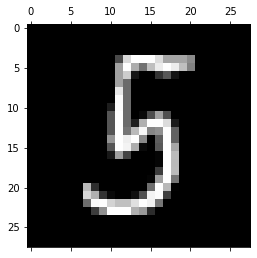

In [ ]:

(train_X, train_y), (test_X, test_y) = mnist.load_data()

y_train = train_y[ np.logical_or(train_y==1 , train_y==5)]
x_train = train_X[ np.logical_or(train_y==1 , train_y==5)]
x_train = x_train[500:1000]
y_train = y_train[500:1000]

plt.gray()
plt.matshow(x_train[55])
plt.show()



Create new features for classification training

In [ ]:
x_new = np.zeros((len(y_train),2))

for i in range(len(y_train)):
    x_curr = x_train[i]
    intensity = np.average(x_curr)
    x_orig = x_curr.reshape(28,28)
    x_flip = np.fliplr(x_curr.reshape((28,28)))
    x_flip2 = np.flipud(x_curr.reshape((28,28)))
    symmetry = np.average(np.abs(x_orig-x_flip)+ np.abs(x_orig-x_flip2))/2
    x_new[i][0]=intensity
    x_new[i][1] = symmetry



Visualize a sample of datapoints

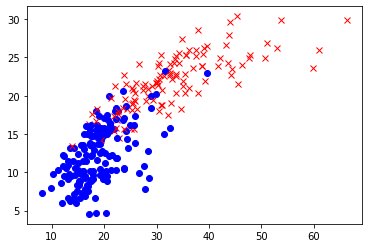

In [ ]:
for i in range(len(y_train)):
    if np.random.uniform()<0.5:
        continue
    if(y_train[i]==1):
        plt.plot(x_new[i][0],x_new[i][1],'ob')
    else:
        plt.plot(x_new[i][0],x_new[i][1],'xr')

degree = 5
poly = PolynomialFeatures(degree,include_bias = False)
x_train_hd = poly.fit_transform(x_new)

reg = linear_model.LinearRegression()
fitted = reg.fit(x_train_hd,y_train)


Train the model on the high dimensional feature space

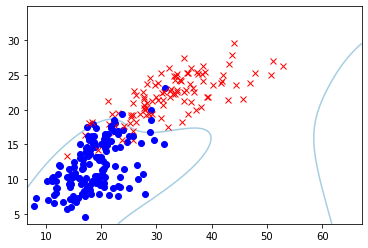

In [ ]:

h = .1  # step size in the mesh
x_min, x_max = x_new[:, 0].min() - 1, x_new[:, 0].max() + 1
y_min, y_max = x_new[:, 1].min() - 1, x_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


@np.vectorize
def func(x,y,reg):
    poly = PolynomialFeatures(degree,include_bias = False)
    x_val = np.array([x,y])
    w = reg.coef_
    Z =  poly.fit_transform(x_val.reshape(1, -1)).dot(w) + reg.intercept_
    return Z

for i in range(len(y_train)):
    if np.random.uniform()<0.5:
        continue
    if(y_train[i]==1):
        plt.plot(x_new[i][0],x_new[i][1],'ob')
    else:
        plt.plot(x_new[i][0],x_new[i][1],'xr')


Z = func(xx, yy, reg)
plt.contour(xx, yy, Z, levels=[3],cmap=plt.cm.Paired)